In [2]:
import pandas as pd
import numpy as np

- making an er diagram for the if needed
- making a data constrain function

- assuming all list are matched
- assiming geneID respond to the same proteinID


geneID
 - geneSymbol: str
 - proteinID: dict
    - proteinName
 - cellMarker: dict
    - speciesType: str
    - tissueType: str
    - UberonOntologyID: str
    - cancerType: str
    - cellType: str
    - cellName: str
    - CellOntologyID: str
    - markerResource: tuple
        one of this
        - Experiment: PMID
        - Review: PMID
        - Single-cell sequencing: PMID
        - Company: Company name

## Plan
- explore data myself and meet up with jason to construct detailed parsing plna
- current doing EDA

## problem
- how deal with missing value?
- it seems like all_cell_markers includes all the avaliable dat set from the human cell, mouse cell, and single cell, but further validation is needed
- the mapping index
- lab's working schedule for next few weeks

## 
- remove key s

# Exploration on all_cell_markers

insights:
- tissueType: change the undefined into NaN
- UberonOntologyID: two main kinds (UBERON_0001255, CL_0002248)
- CencerType: change "normal" to NaN
- cellType: normal cell or cancer cell
- expected cellMarker == GeneSymbol == geneID == proteinID


In [13]:
all_cell_markers_df = pd.read_csv('../data/all_cell_markers.txt', sep = r'\t')
all_human_markers_df = pd.read_csv('../data/Human_cell_markers.txt', sep = r'\t')
all_mouse_markers_df = pd.read_csv('../data/Mouse_cell_markers.txt', sep = r'\t')
all_singleCell_markers_df = pd.read_csv('../data/Single_cell_markers.txt', sep = r'\t')
# with open('../data/all_cell_markers.txt', 'r') as file:
#     firstline = file.readline()

cell_markers_df = pd.concat([all_cell_markers_df, all_singleCell_markers_df], axis = 0, ignore_index=True)

/opt/anaconda3/envs/scripps_microbiome/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<AxesSubplot:>

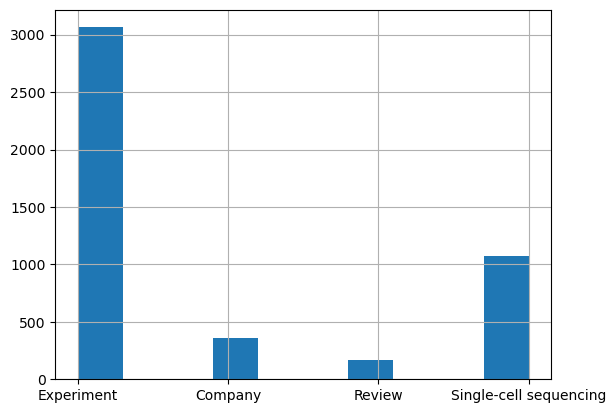

In [65]:
cell_markers_df['markerResource'].hist()

In [68]:
cell_markers_df['PMID'].value_counts()

Company     355
30018341     41
30018341     40
30093597     37
29802404     27
           ... 
17432951      1
19622991      1
21997891      1
22690828      1
21959795      1
Name: PMID, Length: 2462, dtype: int64

In [22]:
cell_markers_df.isna().mean()

speciesType         0.000000
tissueType          0.000000
UberonOntologyID    0.166810
cancerType          0.000000
cellType            0.000000
cellName            0.000000
CellOntologyID      0.199871
cellMarker          0.000000
geneSymbol          0.010949
geneID              0.010949
proteinName         0.012452
proteinID           0.012452
markerResource      0.000000
PMID                0.000000
Company             0.923787
dtype: float64

In [23]:
# no missing value
cell_markers_df.speciesType.value_counts()


Human    3083
Mouse    1575
Name: speciesType, dtype: int64

In [30]:
cell_markers_df.tissueType.value_counts()

Undefined         701
Brain             338
Bone marrow       306
Lung              291
Liver             253
                 ... 
Gastric corpus      1
Nerve               1
Oviduct             1
Nasal concha        1
Umbilical vein      1
Name: tissueType, Length: 181, dtype: int64

In [37]:
cell_markers_df.UberonOntologyID

# cell_markers_df.UberonOntologyID.unique()

0       UBERON_0002113
1       UBERON_0002107
2       UBERON_0001295
3       UBERON_0000923
4       UBERON_0001772
             ...      
4653    UBERON_0000922
4654    UBERON_0000922
4655    UBERON_0000922
4656    UBERON_0000922
4657    UBERON_0000955
Name: UberonOntologyID, Length: 4658, dtype: object

In [38]:
cell_markers_df.cancerType.value_counts()

Normal                                      3834
Breast Cancer                                100
Hepatocellular Cancer                         38
Colorectum Cancer                             36
Prostate Cancer                               35
                                            ... 
Non-Hodgkin's Lymphoma                         1
Non-small Cell Lung Cancer (circulating)       1
Gonadoblastoma                                 1
Vascular Tumour                                1
Kaposi's Sarcoma                               1
Name: cancerType, Length: 133, dtype: int64

In [42]:
cell_markers_df.cellName.unique()

# 'Rheaume et al.Nat Commun.1', 'Rheaume et al.Nat Commun.2',

array(['Proximal tubular cell', 'Ito cell (hepatic stellate cell)',
       'Trophoblast cell', 'Primordial germ cell', 'Epithelial cell',
       'Cytotrophoblast', 'Periosteum-derived progenitor cell',
       'Amnion epithelial cell', 'Primitive streak cell',
       'Stromal vascular fraction cell', 'Bulge stem cell',
       'Semilunar valve cell', 'Villous stromal cell', 'Kupffer cell',
       'Adipose-derived stromal cell', 'Oligodendrocyte',
       'Mesenchymal stem cell', 'Cartilage progenitor cell', 'Osteocyte',
       'Osteoclast', 'Bipolar cell', 'Muller cell', 'Monocyte',
       'Natural killer cell', 'Cancer stem cell', 'Endometrial stem cell',
       'Dental pulp stem cell', 'B cell', 'Adipose-derived stem cell',
       'Preadipocyte progenitor cell', 'Regulatory T (Treg) cell',
       'Nucleus pulposus cell', 'Urine-derived stem cell', 'Fibroblast',
       'Immune cell', 'Endothelial cell', 'T cell', 'Thymocyte',
       'Dendritic cell', 'Neutrophil', 'Lymphocyte',
       'E

In [49]:
cell_markers_df.cellMarker

0                         Intestinal Alkaline Phosphatase
1                                           Synaptophysin
2                                                 CEACAM1
3                                                    VASA
4                                                    KLF6
                              ...                        
4653    C11orf48, C19orf53, DHX9, DIABLO, EIF1AD, EIF4...
4654    Abcf1, Cdc37, Diablo, Eif1ad, Eif4g1, Fam32a, ...
4655    ADCK1, AGL, AIMP1, AKAP12, ARPC3, ATP1B3, ATP5...
4656    Aimp1, Atp5f1, Atp5h, Bcat1, Bin1, Ccbl2, Cct5...
4657    ASCL1, BOC, CCND2, CD24, CHD7, EGFR, NFIB, SOX...
Name: cellMarker, Length: 4658, dtype: object

In [51]:
cell_markers_df.geneSymbol

0                                                    ALPI
1                                                     SYP
2                                                 CEACAM1
3                                                    DDX4
4                                                    KLF6
                              ...                        
4653    LBHD1, C19orf53, DHX9, DIABLO, EIF1AD, EIF4G1,...
4654    Abcf1, Cdc37, Diablo, Eif1ad, Eif4g1, Fam32a, ...
4655    ADCK1, AGL, AIMP1, AKAP12, ARPC3, ATP1B3, NA, ...
4656    Aimp1, Atp5f1, Atp5h, Bcat1, Bin1, Kyat3, Cct5...
4657    ASCL1, BOC, CCND2, CD24, CHD7, EGFR, NFIB, SOX...
Name: geneSymbol, Length: 4658, dtype: object

In [52]:
cell_markers_df.geneID

0                                                     248
1                                                    6855
2                                                     634
3                                                   54514
4                                                    1316
                              ...                        
4653    79081, 28974, 1660, 56616, 84285, 1981, 26017,...
4654    224742, 12539, 66593, 69860, 208643, 67922, 75...
4655    57143, 178, 9255, 9590, 10094, 483, NA, 586, 9...
4656    13722, 11950, 71679, 12035, 30948, 229905, 124...
4657    429, 91653, 894, 100133941, 55636, 1956, 4781,...
Name: geneID, Length: 4658, dtype: object

In [55]:
cell_markers_df.proteinName

0                                                    PPBI
1                                                    SYPH
2                                                   CEAM1
3                                                    DDX4
4                                                    KLF6
                              ...                        
4653    LBHD1, L10K, DHX9, DBLOH, EIF1A, IF4G1, FA32A,...
4654    ABCF1, CDC37, DBLOH, EIF1A, IF4G1, FA32A, KDM5...
4655    ADCK1, GDE, AIMP1, AKA12, ARPC3, AT1B3, AT5F1,...
4656    AIMP1, AT5F1, ATP5H, BCAT1, BIN1, KAT3, TCPE, ...
4657    ASCL1, BOC, CCND2, CD24, CHD7, EGFR, NFIB, SOX...
Name: proteinName, Length: 4658, dtype: object

In [56]:
cell_markers_df.proteinID

0                                                  P09923
1                                                  P08247
2                                                  P13688
3                                                  Q9NQI0
4                                                  Q99612
                              ...                        
4653    Q9BQE6, Q9UNZ5, Q08211, Q9NR28, Q8N9N8, Q04637...
4654    Q6P542, Q61081, Q9JIQ3, Q3THJ3, Q6NZJ6, Q9CR80...
4655    Q86TW2, P35573, Q12904, Q02952, O15145, P54709...
4656    P31230, Q9CQQ7, Q9DCX2, P24288, O08539, Q71RI9...
4657    P50553, Q9BWV1, P30279, P25063, Q9P2D1, P00533...
Name: proteinID, Length: 4658, dtype: object

In [58]:
cell_markers_df.markerResource.value_counts()

Experiment                3064
Single-cell sequencing    1070
Company                    355
Review                     169
Name: markerResource, dtype: int64

In [59]:
cell_markers_df.PMID

0        9263997
1       10595912
2       10751340
3       10920202
4       12407152
          ...   
4653    23892778
4654    23892778
4655    23892778
4656    23892778
4657    27806376
Name: PMID, Length: 4658, dtype: object

In [62]:
cell_markers_df.Company.value_counts()

ebioscience           77
miltenyibiotec        60
abcam                 53
biolegend             52
bio-rad-antibodies    47
rndsystems            35
labome                16
bdbiosciences         15
Name: Company, dtype: int64

## Constribute meaning understanding
- **speciesType**: the species from which the data originates
    - there are only two data type, either `Human` or `Mouse`
- **tissueType**: the type of tissues from which data originates
    - in total 181 different kinds of cells
    - a lot of them are undefined
- **UberonOntologyID**: The universal unique identifier of the anatomy structure found in animals 
    - needs to confirm with the team
    - contain missing value
- **cancerType**: the association of the cell marker with the cancer name
    - no cancer cell are named as `Normal`
- **cellName**: the English name of the cell that marker belong to
- **CellOntologyID**: The universal unique identifier of the cell that marker belong to
    - contain missing value
- **cellMarker**: a marker molecule of the cell
    - in string list, can be convert to list
- **geneSymbol**: gene expression of the cell marker
- **geneID**: The universal unique identifier of the gene
    - contain missing value
- **proteinName**: name of the protein
    - contain missing value
- **proteinID**: The universal unique identifier of the protein
- **markerResource**: the type of resouce or methologoy used to identify the marker
    - there are only four data type, either `Experiment` or `Single-cell sequencing` or `Company` or `Review`
- **PMID**: The PudMed ID for the publication or study where the marker data was reported
    - abnormal value contain `company`
- **Company**: the company associated with the resouces

In [34]:
all_cell_markers_df.columns

Index(['speciesType', 'tissueType', 'UberonOntologyID', 'cancerType',
       'cellType', 'cellName', 'CellOntologyID', 'cellMarker', 'geneSymbol',
       'geneID', 'proteinName', 'proteinID', 'markerResource', 'PMID',
       'Company'],
      dtype='object')

## Data distribition

In [36]:
all_cell_markers_df.speciesType.value_counts()

Human    2868
Mouse    1255
Name: speciesType, dtype: int64

In [ ]:
all_cell_markers_df.tissueType.value_counts()

Undefined           695
Brain               254
Bone marrow         254
Lung                249
Liver               240
                   ... 
Fetal brain           1
Vocal fold            1
Nerve                 1
Primitive streak      1
Premolar              1
Name: tissueType, Length: 181, dtype: int64

In [46]:
all_cell_markers_df.UberonOntologyID.value_counts()

UBERON_0000955    254
UBERON_0002371    254
UBERON_0002048    249
UBERON_0002107    240
UBERON_0005408    215
                 ... 
UBERON_0003215      1
UBERON_0006530      1
UBERON_0001052      1
UBERON_0003922      1
UBERON_0005384      1
Name: UberonOntologyID, Length: 172, dtype: int64

In [47]:
all_cell_markers_df.cancerType.value_counts()

Normal                                      3315
Breast Cancer                                100
Colorectum Cancer                             36
Prostate Cancer                               35
Colon Cancer                                  34
                                            ... 
Non-Hodgkin's Lymphoma                         1
Non-small Cell Lung Cancer (circulating)       1
Gonadoblastoma                                 1
Vascular Tumour                                1
oligodendroglioma                              1
Name: cancerType, Length: 133, dtype: int64

In [48]:
all_cell_markers_df.cellType.value_counts()

Normal cell    3315
Cancer cell     808
Name: cellType, dtype: int64

In [49]:
all_cell_markers_df.cellName.value_counts()

Cancer stem cell                                             593
Stem cell                                                    186
Endothelial cell                                             157
Macrophage                                                   139
Mesenchymal stem cell                                        137
                                                            ... 
Neuron-restricted precursor                                    1
Limbal mesenchymal cell                                        1
Quiescent small intestinal stem cell                           1
Adipose multilineage-differentiating stress-enduring cell      1
CD4+ T follicular helper cell                                  1
Name: cellName, Length: 681, dtype: int64

In [50]:
all_cell_markers_df.CellOntologyID.value_counts()

CL_0000034    308
CL_0000134    181
CL_0000115    168
CL_0000235    141
CL_0000084    132
             ... 
CL_0000166      1
CL_0008020      1
CL_0000058      1
CL_0000210      1
CL_0000850      1
Name: CellOntologyID, Length: 281, dtype: int64

In [51]:
all_cell_markers_df.cellMarker.value_counts()

CD133                                                                 109
CD44                                                                   58
CD31                                                                   50
CD68                                                                   47
CD3                                                                    39
                                                                     ... 
BDCA1, CD11c                                                            1
BDCA2, CD123                                                            1
CLEC9A                                                                  1
TAGLN2                                                                  1
ASCL1, BOC, CCND2, CD24, CHD7, EGFR, NFIB, SOX11, SOX2, SOX4, TCF4      1
Name: cellMarker, Length: 2517, dtype: int64

In [52]:
all_cell_markers_df.geneSymbol.value_counts()

PROM1                                                                 109
CD44                                                                   54
PECAM1                                                                 45
CD68                                                                   39
CD34                                                                   30
                                                                     ... 
KRT18, KRT19                                                            1
LIN28A                                                                  1
PROM1, NCAM1                                                            1
CLEC4F, VSIG4                                                           1
ASCL1, BOC, CCND2, CD24, CHD7, EGFR, NFIB, SOX11, SOX2, SOX4, TCF4      1
Name: geneSymbol, Length: 2485, dtype: int64

In [53]:
all_cell_markers_df.geneID.value_counts()

8842                                                                     109
960                                                                       54
5175                                                                      45
968                                                                       39
947                                                                       30
                                                                        ... 
8842, 4684                                                                 1
165530, 11326                                                              1
59, 2670                                                                   1
Albumin family, 4311, 3875, 3856                                           1
429, 91653, 894, 100133941, 55636, 1956, 4781, 6664, 6657, 6659, 6925      1
Name: geneID, Length: 2487, dtype: int64

In [54]:
all_cell_markers_df.proteinName.value_counts()

PROM1                                                                 115
CD44                                                                   61
PECA1                                                                  57
CD68                                                                   47
[CD3D, CD3E, CD3G]                                                     39
                                                                     ... 
Albumin family, NEP, K1C18, K2C8                                        1
Albumin family, K2C8                                                    1
Albumin family, K1C18                                                   1
FETA, FBF1, HNF4A                                                       1
ASCL1, BOC, CCND2, CD24, CHD7, EGFR, NFIB, SOX11, SOX2, SOX4, ITF2      1
Name: proteinName, Length: 2350, dtype: int64

In [55]:
all_cell_markers_df.proteinID.value_counts()

O43490                                                                                    109
P16070                                                                                     54
P16284                                                                                     45
P34810                                                                                     39
P28906                                                                                     30
                                                                                         ... 
Q8N1N0, Q9Y279                                                                              1
P62736, P14136                                                                              1
Albumin family, P08473, P05783, P05787                                                      1
Albumin family, P05787                                                                      1
P50553, Q9BWV1, P30279, P25063, Q9P2D1, P00533, O00712, P357

In [56]:
all_cell_markers_df.markerResource.value_counts()

Experiment                3064
Single-cell sequencing     535
Company                    355
Review                     169
Name: markerResource, dtype: int64

In [57]:
all_cell_markers_df.PMID.value_counts()

Company     355
30018341     41
30093597     37
29802404     27
29545511     21
           ... 
28869524      1
17714779      1
18701045      1
20060164      1
16849681      1
Name: PMID, Length: 2379, dtype: int64

In [58]:
all_cell_markers_df.Company.value_counts()

ebioscience           77
miltenyibiotec        60
abcam                 53
biolegend             52
bio-rad-antibodies    47
rndsystems            35
labome                16
bdbiosciences         15
Name: Company, dtype: int64

## Missing value

In [61]:
all_cell_markers_df.isna().mean().sort_values(ascending=False)

Company             0.913898
CellOntologyID      0.210526
UberonOntologyID    0.180936
proteinName         0.013582
proteinID           0.013582
geneSymbol          0.012127
geneID              0.012127
speciesType         0.000000
tissueType          0.000000
cancerType          0.000000
cellType            0.000000
cellName            0.000000
cellMarker          0.000000
markerResource      0.000000
PMID                0.000000
dtype: float64

In [132]:
test = all_cell_markers_df.copy().dropna(subset=['geneSymbol', 'proteinID'])    #[['cellMarker', 'geneSymbol', 'geneID']]
test['cellMarker'] = test['cellMarker'].apply(lambda x: x.split(', '))
test['geneSymbol'] = test['geneSymbol'].apply(lambda x: x.split(', '))
test['geneID'] = test['geneID'].apply(lambda x: x.split(', '))
test['proteinID'] = test['proteinID'].apply(lambda x: x.split(', '))

test['len_cellMarker'] = test['cellMarker'].apply(len)
test['len_geneSymbol'] = test['geneSymbol'].apply(len)
test['len_geneID'] = test['geneID'].apply(len)
test['len_proteinID'] = test['proteinID'].apply(len)

In [115]:
x = test[~((test['len_cellMarker'] == test['len_geneSymbol']) & (test['len_geneSymbol'] == test['len_geneID']))]

In [122]:
x.iloc[0]['geneSymbol']

['ITGAM', 'CD14', 'ITGB2', '[FCGR2A', 'FCGR2B', 'FCGR2C]', 'CD68']

In [123]:
x.iloc[0]['cellMarker']

['CD11b', 'CD14', 'CD18', 'CD32', 'CD68']

In [124]:
x.iloc[0]['geneID']

['3684', '929', '3689', '[2212', '2213', '9103]', '968']

In [129]:
# the problem of spliting for the cell maker

In [130]:
test

,speciesType,tissueType,UberonOntologyID,cancerType,cellType,cellName,CellOntologyID,cellMarker,geneSymbol,geneID,proteinName,proteinID,markerResource,PMID,Company,len_cellMarker,len_geneSymbol,len_geneID
0,Human,Kidney,UBERON_0002113,Normal,Normal cell,Proximal tubular cell,NaN,[Intestinal Alkaline Phosphatase],[ALPI],[248],PPBI,P09923,Experiment,9263997,NaN,1,1,1
1,Human,Liver,UBERON_0002107,Normal,Normal cell,Ito cell (hepatic stellate cell),CL_0000632,[Synaptophysin],[SYP],[6855],SYPH,P08247,Experiment,10595912,NaN,1,1,1
2,Human,Endometrium,UBERON_0001295,Normal,Normal cell,Trophoblast cell,CL_0000351,[CEACAM1],[CEACAM1],[634],CEAM1,P13688,Experiment,10751340,NaN,1,1,1
3,Human,Germ,UBERON_0000923,Normal,Normal cell,Primordial germ cell,CL_0000670,[VASA],[DDX4],[54514],DDX4,Q9NQI0,Experiment,10920202,NaN,1,1,1
4,Human,Corneal epithelium,UBERON_0001772,Normal,Normal cell,Epithelial cell,CL_0000066,[KLF6],[KLF6],[1316],KLF6,Q99612,Experiment,12407152,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,Human,Embryo,UBERON_0000922,Normal,Normal cell,8-cell stage cell (Blastomere),CL_0000353,"[C11orf48, C19orf53, DHX9, DIABLO, EIF1AD, EIF...","[LBHD1, C19orf53, DHX9, DIABLO, EIF1AD, EIF4G1...","[79081, 28974, 1660, 56616, 84285, 1981, 26017...","LBHD1, L10K, DHX9, DBLOH, EIF1A, IF4G1, FA32A,...","Q9BQE6, Q9UNZ5, Q08211, Q9NR28, Q8N9N8, Q04637...",Single-cell sequencing,23892778,NaN,19,19,19
4119,Mouse,Embryo,UBERON_0000922,Normal,Normal cell,8-cell stage cell (Blastomere),CL_0000353,"[Abcf1, Cdc37, Diablo, Eif1ad, Eif4g1, Fam32a,...","[Abcf1, Cdc37, Diablo, Eif1ad, Eif4g1, Fam32a,...","[224742, 12539, 66593, 69860, 208643, 67922, 7...","ABCF1, CDC37, DBLOH, EIF1A, IF4G1, FA32A, KDM5...","Q6P542, Q61081, Q9JIQ3, Q3THJ3, Q6NZJ6, Q9CR80...",Single-cell sequencing,23892778,NaN,12,12,12
4120,Human,Embryo,UBERON_0000922,Normal,Normal cell,Morula cell (Blastomere),CL_0000360,"[ADCK1, AGL, AIMP1, AKAP12, ARPC3, ATP1B3, ATP...","[ADCK1, AGL, AIMP1, AKAP12, ARPC3, ATP1B3, NA,...","[57143, 178, 9255, 9590, 10094, 483, NA, 586, ...","ADCK1, GDE, AIMP1, AKA12, ARPC3, AT1B3, AT5F1,...","Q86TW2, P35573, Q12904, Q02952, O15145, P54709...",Single-cell sequencing,23892778,NaN,112,112,112
4121,Mouse,Embryo,UBERON_0000922,Normal,Normal cell,Morula cell (Blastomere),CL_0000360,"[Aimp1, Atp5f1, Atp5h, Bcat1, Bin1, Ccbl2, Cct...","[Aimp1, Atp5f1, Atp5h, Bcat1, Bin1, Kyat3, Cct...","[13722, 11950, 71679, 12035, 30948, 229905, 12...","AIMP1, AT5F1, ATP5H, BCAT1, BIN1, KAT3, TCPE, ...","P31230, Q9CQQ7, Q9DCX2, P24288, O08539, Q71RI9...",Single-cell sequencing,23892778,NaN,37,37,37


In [ ]:
_id : geneid


elastic_search: (integer field) number of participants